1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

2. Load Dataset

In [4]:
data = pd.read_csv('earthquake_1995-2023.csv')


(a)   Data Inspection

In [5]:
print(" Dataset Shape:", data.shape)
print("\n First 5 rows:\n", data.head())
print("\n Dataset Info:")
print(data.info())
print("\n Missing Values:\n", data.isnull().sum())


 Dataset Shape: (1000, 19)

 First 5 rows:
                                       title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6   green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5     NaN        1  820  at   79  0.879451  172.8      Mi   21.000   

   latitude  longi

(b) Data Preprocessing


Drop missing values (can also fill or impute depending on data nature)

In [6]:
data_clean = data.dropna()

encoding if categorical present

In [7]:
le = LabelEncoder()
for col in data_clean.select_dtypes(include='object').columns:
    data_clean[col] = le.fit_transform(data_clean[col])


<ipython-input-7-fdd31c12de70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
<ipython-input-7-fdd31c12de70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
<ipython-input-7-fdd31c12de70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

 scaling numerical data

In [8]:
scaler = StandardScaler()
numeric_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns
data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])
print("\n Data after cleaning & encoding:\n", data_clean.head())



 Data after cleaning & encoding:
        title  magnitude  date_time       cdi       mmi     alert   tsunami  \
2  -1.160199  -0.923061  -0.147067  0.019285 -1.180122 -0.876978 -1.019049   
17 -1.323607  -1.181909  -1.487015  0.019285 -0.535313  1.527151  0.981307   
18  0.604611   0.112330  -1.617742  0.019285  0.109496 -0.876978  0.981307   
19 -1.454334  -1.181909   0.571929 -1.513890 -1.824931 -0.876978 -1.019049   
20 -1.552379  -1.181909   0.408521  0.019285 -1.180122 -0.876978 -1.019049   

         sig       net       nst      dmin       gap   magType     depth  \
2  -0.431396  0.232688 -0.015909 -0.110600  0.047262  0.210559  0.451198   
17 -0.878882  0.232688  0.194118 -0.750381  0.125168  0.210559  0.030281   
18 -0.647803  0.232688  0.200296  2.141726  0.164121  0.210559 -0.245216   
19 -0.877048  0.232688  0.150877 -0.116212  0.242027  0.210559  0.698376   
20  0.395720  0.232688  0.379437  0.308437 -0.537033  0.210559  0.555038   

    latitude  longitude  location  cont

<ipython-input-8-e12eea9d49eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])


(c) Visualization 8 Different Types

In [9]:
plt.figure(figsize=(20, 30))


<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

1. Histogram

Text(0.5, 1.0, 'Histogram')

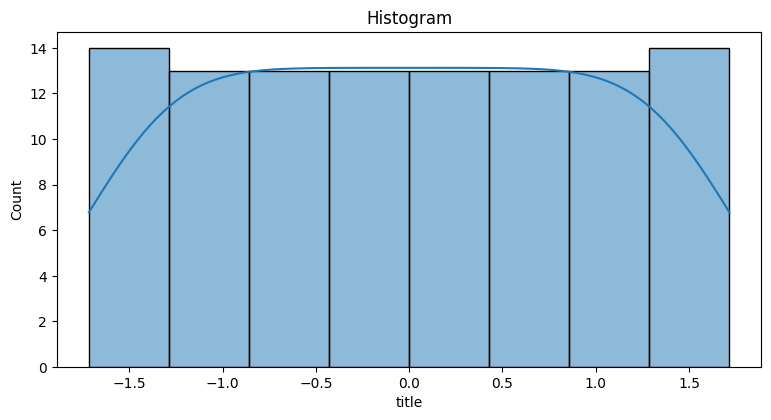

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.histplot(data_clean[numeric_cols[0]], kde=True)
plt.title('Histogram')


2. Boxplot

Text(0.5, 1.0, 'Boxplot')

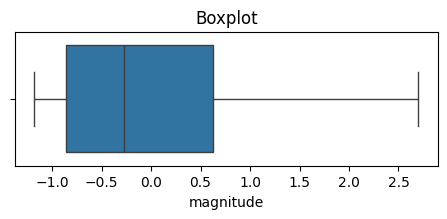

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 2, 2)
sns.boxplot(x=data_clean[numeric_cols[1]])
plt.title('Boxplot')

3. Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

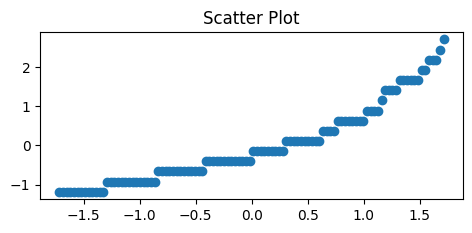

In [12]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 2, 3)
plt.scatter(data_clean[numeric_cols[0]], data_clean[numeric_cols[1]])
plt.title('Scatter Plot')

4. HeatMap (Correlation Matrix)

Text(0.5, 1.0, 'Correlation Heatmap')

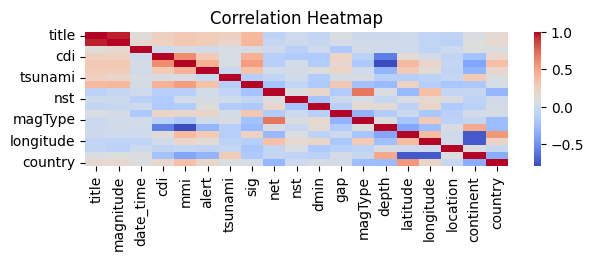

In [13]:
plt.figure(figsize=(15, 8))
plt.subplot(4, 2, 4)
sns.heatmap(data_clean.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

5. BarPlot

<Axes: >

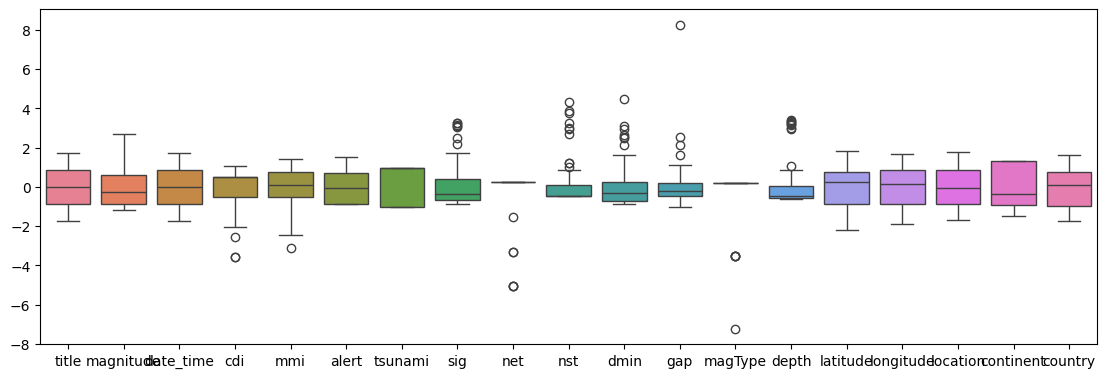

In [14]:
plt.figure(figsize=(30, 20))
plt.subplot(4, 2, 5)
col = data_clean.select_dtypes(include='int').columns
sns.countplot(x=col[0], data=data_clean) if len(col) > 0 else sns.boxplot(data=data_clean.select_dtypes(include='float'))


6. Line Plot

Text(0.5, 1.0, 'Line Plot')

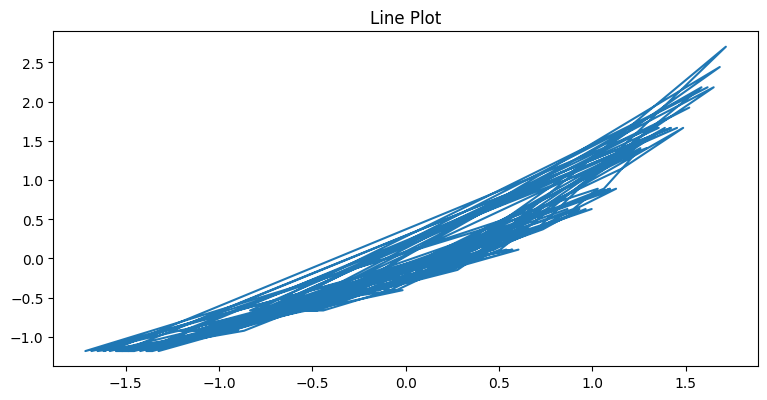

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 6)
plt.plot(data_clean[numeric_cols[0]][:100], data_clean[numeric_cols[1]][:100])
plt.title('Line Plot')

7. Violin Plot

Text(0.5, 1.0, 'Violin Plot')

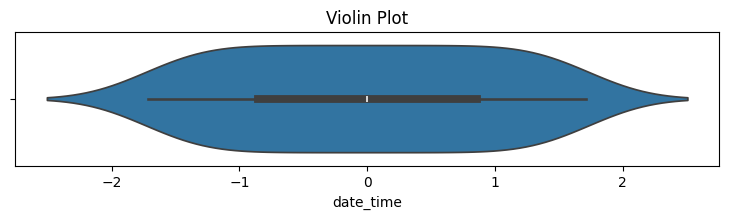

In [16]:
plt.figure(figsize=(20, 8))
plt.subplot(4, 2, 7)
sns.violinplot(x=data_clean[numeric_cols[2]])
plt.title('Violin Plot')

8. Pair Plot (Only first 4 columns to keep it light)

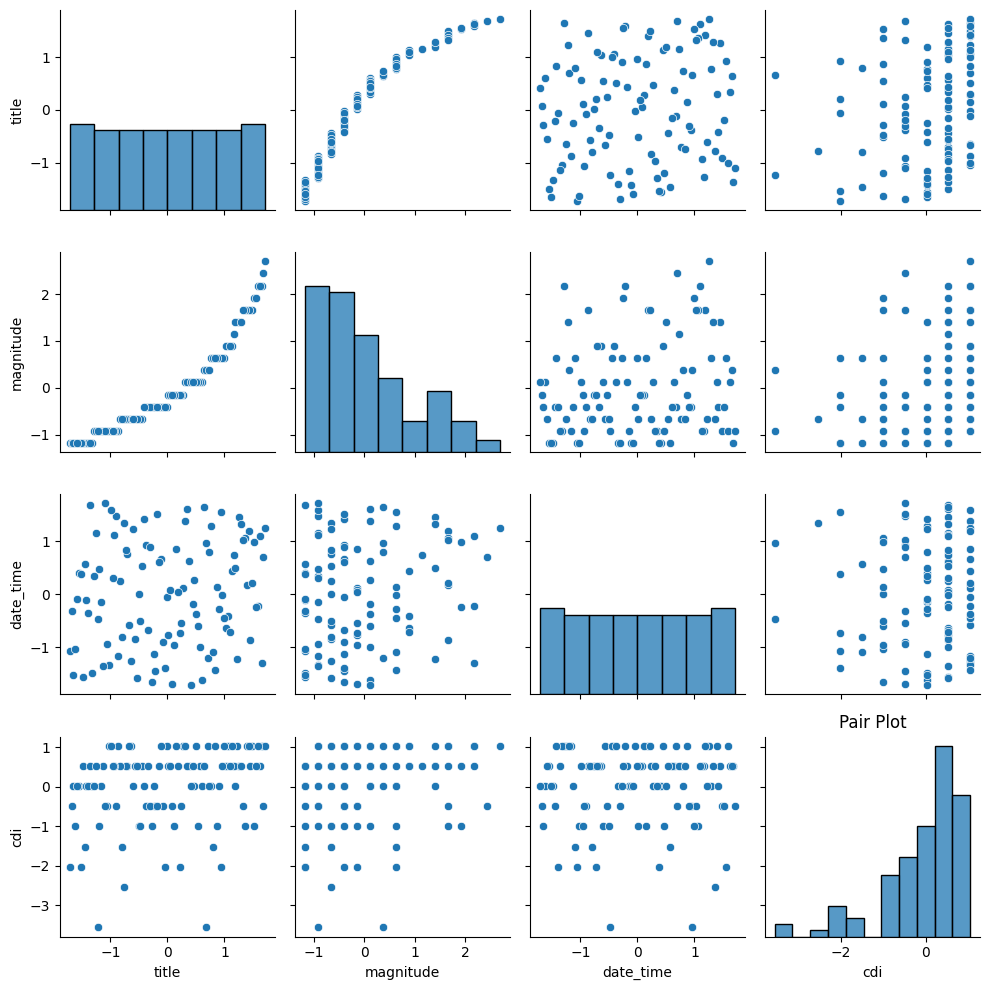

In [17]:
sns.pairplot(data_clean.iloc[:, :4])
plt.title('Pair Plot')

plt.tight_layout()
plt.show()


(d) Model Training

In [18]:
# Assume the first column as feature and second column as target (adjust as needed)
X = data_clean.drop(columns=[data_clean.columns[1]])
y = data_clean[data_clean.columns[1]]

In [19]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1:  Linear Regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_lin = lin_reg.predict(X_test)
print("\nLinear Regression R2 Score:", r2_score(y_test, pred_lin))


Linear Regression R2 Score: 0.8953138175760111


Model 2:Decision Tree Regressor

In [21]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
pred_dt = dt_reg.predict(X_test)
print("\n Decision Tree Regressor R2 Score:", r2_score(y_test, pred_dt))


 Decision Tree Regressor R2 Score: 0.9915221579961464


Model 3: Random Forest Regressor

In [22]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)
print("\n Random Forest Regressor R2 Score:", r2_score(y_test, pred_rf))


 Random Forest Regressor R2 Score: 0.9788327360308287


Model 4: Support Vector Regressor (SVR)

In [23]:
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
pred_svr = svr_reg.predict(X_test)
print("\n SVR R2 Score:", r2_score(y_test, pred_svr))


 SVR R2 Score: 0.7629332657898777


(e) Evaluation Reports

In [24]:
print("\n Linear Regression R2 Score:", r2_score(y_test, pred_lin))
print("\n Decision Tree R2 Score:", r2_score(y_test, pred_dt))
print("\n Random Forest R2 Score:", r2_score(y_test, pred_rf))
print("\n SVR R2 Score:", r2_score(y_test, pred_svr))



 Linear Regression R2 Score: 0.8953138175760111

 Decision Tree R2 Score: 0.9915221579961464

 Random Forest R2 Score: 0.9788327360308287

 SVR R2 Score: 0.7629332657898777


Let's Test with new earthquake Data

input example data like :

 6.5 20.0 0.8 1.1 0.6 3.0 7.2 2.0 1.2 4.8 2.9 1.0 1.3 5.0 3.5 0.8 3.0 5.2


In [25]:
# Get user input
user_input = input("\nEnter the 18 earthquake feature values separated by space:\n")
input_list = list(map(float, user_input.strip().split()))


Enter the 18 earthquake feature values separated by space:
6.5 20.0 0.8 1.1 0.6 3.0 7.2 2.0 1.2 4.8 2.9 1.0 1.3 5.0 3.5 0.8 3.0 5.2


In [26]:
if len(input_list) != X_train.shape[1]:
    print(f"\n Error: You entered {len(input_list)} features, but the model expects {X_train.shape[1]}.")
else:
    new_earthquake_data = np.array([input_list])
    predicted_value = rf_reg.predict(new_earthquake_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [27]:
# Dynamically check what is the min, max, and mean of your training target
print(f"\nℹ Model prediction range - Min: {y_train.min()}, Max: {y_train.max()}, Mean: {y_train.mean()}")


ℹ Model prediction range - Min: -1.1819089186222054, Max: 2.4419605756657137, Mean: -0.10337633103651557


In [28]:
dynamic_threshold = y_train.mean() + 0.5

In [29]:
print(f" Dynamic Hazard Threshold: {dynamic_threshold:.2f}")


 Dynamic Hazard Threshold: 0.40


In [30]:
if predicted_value[0] > dynamic_threshold:
        print(f"\n The earthquake is predicted to be HAZARDOUS with predicted value: {predicted_value[0]:.2f}")
else:
        print(f"\n The earthquake is predicted to be NOT hazardous with predicted value: {predicted_value[0]:.2f}")


 The earthquake is predicted to be HAZARDOUS with predicted value: 2.12
